Для отрисовки графиков запустить первые 5 ячеек и все, начиная с той, где стоит знак ->

In [1]:
from Assemblies.game import GameField
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [2]:
eps = 0.01
bs = 9/5+eps

cp = 50
#процент выключенных узлов offp_close соответствует (100 - offp_close) проценту заполненности решётки
offp_close = np.linspace(23, 15, num=17, dtype=float)

seeds = np.zeros(100,dtype=int)
for i in range(100):
    seeds[i] = i + 1

    
#3000 шагов отжига и 500 щагов эволюции
burnin1 = 3000
evol1 = 500

n = len(seeds)
m = len(offp_close)

In [3]:
#массив значений persistence на протяжении t-tw шагов для определённой реализации игры
def persistence(size, coop_percentage, off_percentage, seed, b, t, tw):
    np.random.seed(seed)
    instance = np.array(np.random.rand(size, size) <= 0.01 * off_percentage, dtype=int) * (-1)
    active_indexes=(-1-instance).nonzero()
    active_size=active_indexes[0].size
    active = np.array(np.random.rand(active_size) > 0.01 * coop_percentage, dtype=int)
    instance[active_indexes]=np.copy(active)
    
    c=active_size
    persistence=np.zeros(t-tw)
    
    #флаги индексы элементов
    #0 - прошёл проверку на неизменность стратегий, 1 - не прошёл
    dropout_flags=np.zeros(active_size, dtype=int) 
    
    game = GameField(size, b)
    game.field = np.copy(instance)
    game.evolveQ(tw)
    for step in range(t-tw):
        game.evolveQ(1)
        
        evolution=np.copy(game.field[active_indexes])
        
        for i in range(len(evolution)):
            if (dropout_flags[i]!=1) and (evolution[i]!=active[i]):
                c-=1
                dropout_flags[i]=1
        
        persistence[step]=c/active_size
    return persistence

In [4]:
p_star = 80.5

In [5]:
points_close=np.linspace(60, p_star, num=42, dtype=float)
n = len(seeds)
m = len(points_close)

#### 50x50

In [10]:
t1=3000
tw1=0

pers_close50=np.zeros((n, m))
for j in range(n):
    for i in range(m):
        pers_close50[j][i]=persistence(size=50,coop_percentage=cp,off_percentage=100 - points_close[i],seed=seeds[j],b=bs,t=t1,tw=tw1)[-1]
    #print('seed =', seeds[j])

#### 100x100

In [11]:
t1=3000
tw1=0

pers_close100=np.zeros((n, m))
for j in range(n):
    for i in range(m):
        pers_close100[j][i]=persistence(size=100,coop_percentage=cp,off_percentage=100 - points_close[i],seed=seeds[j],b=bs,t=t1,tw=tw1)[-1]
    #print('seed =', seeds[j])

#### 150x150

In [12]:
t1=3000
tw1=0

pers_close150=np.zeros((n, m))
for j in range(n):
    for i in range(m):
        pers_close150[j][i]=persistence(size=150,coop_percentage=cp,off_percentage=100 - points_close[i],seed=seeds[j],b=bs,t=t1,tw=tw1)[-1]
    #print('seed =', seeds[j])

In [13]:
line_pers50 = list(np.reshape(pers_close50, (n * m,)))

with open('pers50.txt', 'w', encoding='utf8') as f:
    json.dump(line_pers50, f)
f.close()

line_pers100 = list(np.reshape(pers_close100, (n * m,)))

with open('pers100.txt', 'w', encoding='utf8') as f:
    json.dump(line_pers100, f)
f.close()

line_pers150 = list(np.reshape(pers_close150, (n * m,)))

with open('pers150.txt', 'w', encoding='utf8') as f:
    json.dump(line_pers150, f)
f.close()

# ->

In [6]:
with open('pers50.txt', 'r', encoding='utf8') as f:
    copy_pers50 = np.reshape(np.array(json.load(f)), (n, m))
    
with open('pers100.txt', 'r', encoding='utf8') as f:
    copy_pers100 = np.reshape(np.array(json.load(f)), (n, m))
    
with open('pers150.txt', 'r', encoding='utf8') as f:
    copy_pers150 = np.reshape(np.array(json.load(f)), (n, m))

'''
вычисления 200x200 в файле 
https://github.com/bu147/spatial-games-square-grid/blob/master/300x300%2C%20200x200%2C%20100x100%2C%20100%20replics.ipynb
'''
with open('pers.txt', 'r', encoding='utf8') as f:
    copy_pers200 = np.reshape(np.array(json.load(f)), (n, m))

In [7]:
aver_pers_close50 = np.mean(copy_pers50, axis=0)
errs_pers50 = np.zeros(len(aver_pers_close50))
for i in range(len(aver_pers_close50)):
    errs_pers50[i] = np.sqrt(sum((aver_pers_close50[i] - copy_pers50[::, i]) ** 2) / n) / np.sqrt(n)   
    
aver_pers_close100 = np.mean(copy_pers100, axis=0)
errs_pers100 = np.zeros(len(aver_pers_close100))
for i in range(len(aver_pers_close100)):
    errs_pers100[i] = np.sqrt(sum((aver_pers_close100[i] - copy_pers100[::, i]) ** 2) / n) / np.sqrt(n)   
    
aver_pers_close150 = np.mean(copy_pers150, axis=0)
errs_pers150 = np.zeros(len(aver_pers_close150))
for i in range(len(aver_pers_close150)):
    errs_pers150[i] = np.sqrt(sum((aver_pers_close150[i] - copy_pers150[::, i]) ** 2) / n) / np.sqrt(n)   

aver_pers_close200 = np.mean(copy_pers200, axis=0)
errs_pers200 = np.zeros(len(aver_pers_close200))
for i in range(len(aver_pers_close200)):
    errs_pers200[i] = np.sqrt(sum((aver_pers_close200[i] - copy_pers200[::, i]) ** 2) / n) / np.sqrt(n)   

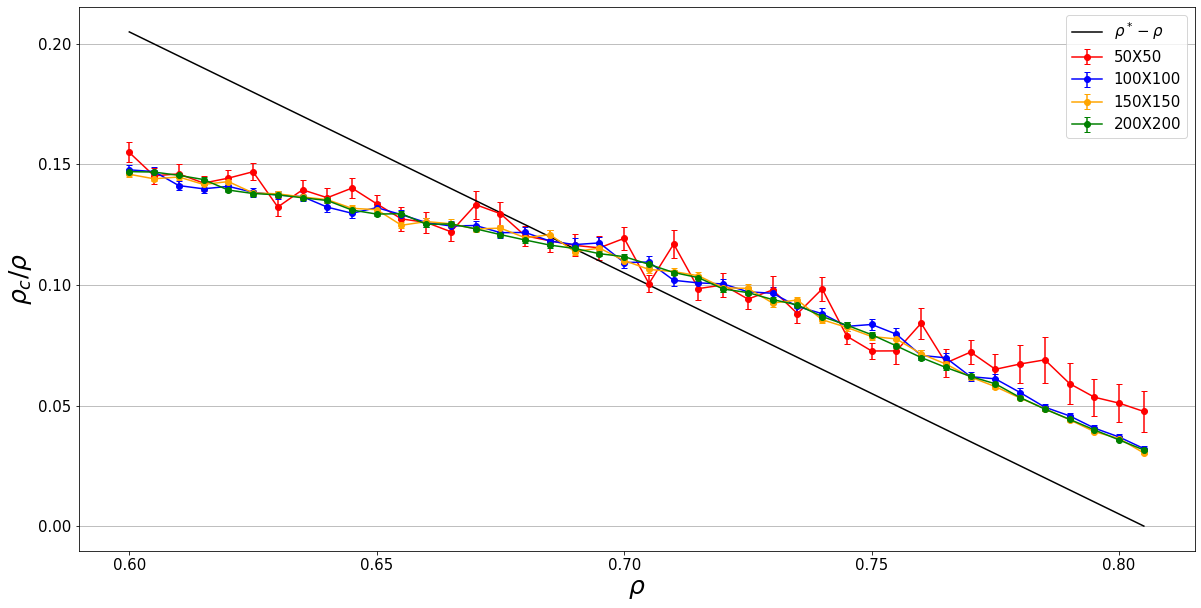

In [8]:
fig, ax = plt.subplots(1,1,figsize=(20,10))

ax.errorbar(points_close*0.01, aver_pers_close50, yerr=errs_pers50, fmt='o-', capsize=3, label='50X50', color='red')
ax.errorbar(points_close*0.01, aver_pers_close100, yerr=errs_pers100, fmt='o-', capsize=3, label='100X100', color='blue')
ax.errorbar(points_close*0.01, aver_pers_close150, yerr=errs_pers150, fmt='o-', capsize=3, label='150X150', color='orange')
ax.errorbar(points_close*0.01, aver_pers_close200, yerr=errs_pers200, fmt='o-', capsize=3, label='200X200', color='green')
ax.plot(points_close*0.01, (p_star - points_close)*0.01, label='$%s$'%'\\rho^* - \\rho', color='black')

ax.set_xlabel('$%s$'%'\\rho',fontsize=25)
ax.set_ylabel('$%s$'%'\\rho_c/\\rho',fontsize=25)
ax.legend(prop={'size': 15})
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(b=True,axis='y')

Отложим те же графики, но на оси абсцисс теперь не $\rho$, а $\rho^* - \rho$, чтобы проще было увидеть рост

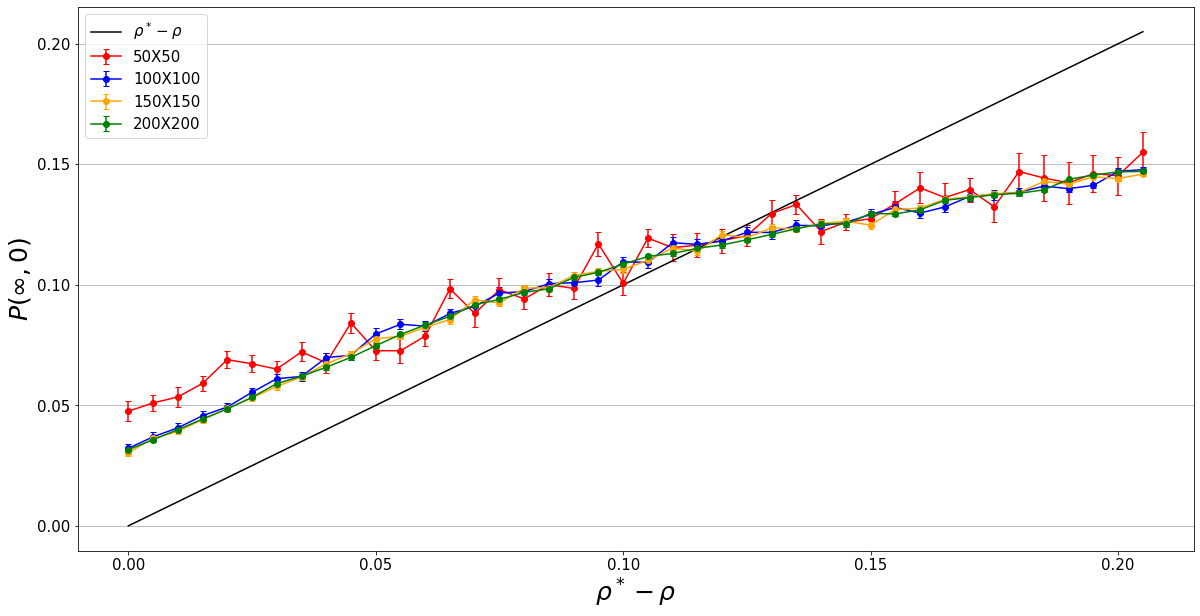

In [9]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.errorbar((p_star - points_close)[::-1]*0.01, aver_pers_close50[::-1], yerr=errs_pers50, fmt='o-', capsize=3, label='50X50', color='red')
ax.errorbar((p_star - points_close)[::-1]*0.01, aver_pers_close100[::-1], yerr=errs_pers100, fmt='o-', capsize=3, label='100X100', color='blue')
ax.errorbar((p_star - points_close)[::-1]*0.01, aver_pers_close150[::-1], yerr=errs_pers150, fmt='o-', capsize=3, label='150X150', color='orange')
ax.errorbar((p_star - points_close)[::-1]*0.01, aver_pers_close200[::-1], yerr=errs_pers200, fmt='o-', capsize=3, label='200X200', color='green')
ax.plot((p_star - points_close)[::-1]*0.01, (p_star - points_close)[::-1]*0.01, label='$%s$'%'\\rho^* - \\rho', color='black')


ax.set_xlabel('$%s$'%'\\rho^* - \\rho',fontsize=25)
ax.set_ylabel('$%s$'%'P(\\infty,0)',fontsize=25)
ax.legend(prop={'size': 15})
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(b=True,axis='y')

### Первый вариант фитирования

$ P(\infty, 0)\propto (\rho^* - \rho)^\alpha$

$\ln{P(\infty,0)}\propto \alpha \ln{(\rho^* - \rho)}$

In [10]:
pp = (p_star - points_close)[::-1][1:]*0.01 #исключая ноль
lnpp = np.log(pp)

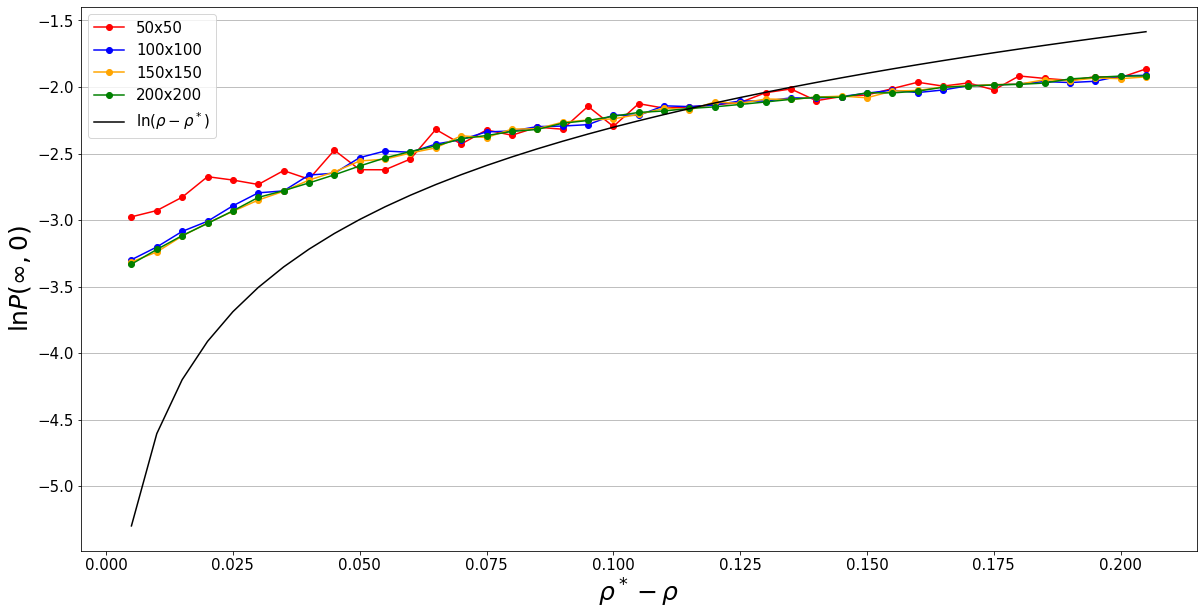

In [11]:
fig, ax = plt.subplots(1,1,figsize=(20,10))

ax.plot(pp, np.log(aver_pers_close50[::-1][1:]), '-o', label='50x50', color='red')
ax.plot(pp, np.log(aver_pers_close100[::-1][1:]), '-o', label='100x100', color='blue')
ax.plot(pp, np.log(aver_pers_close150[::-1][1:]), '-o', label='150x150', color='orange')
ax.plot(pp, np.log(aver_pers_close200[::-1][1:]), '-o', label='200x200', color='green')
ax.plot(pp, lnpp, label='$%s$'%'\ln{(\\rho - \\rho^*)}', color='black')

ax.set_xlabel('$%s$'%'\\rho^* - \\rho',fontsize=25)
ax.set_ylabel('$%s$'%'\ln{P(\\infty,0)}',fontsize=25)
ax.legend(prop={'size': 15})
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(b=True,axis='y')

$\alpha = \langle\frac{\ln{P(\infty,0)}}{\ln{(\rho^* - \rho)}}\rangle$

In [12]:
alpha50 = np.mean(np.log(aver_pers_close50[::-1][1:]) / lnpp)
print(alpha50)

alpha100 = np.mean(np.log(aver_pers_close100[::-1][1:]) / lnpp)
print(alpha100)

alpha150 = np.mean(np.log(aver_pers_close150[::-1][1:]) / lnpp)
print(alpha150)

alpha200 = np.mean(np.log(aver_pers_close200[::-1][1:]) / lnpp)
print(alpha200)

0.9576407385213527
0.9720860415154938
0.9742941033872865
0.9749998084497835


Итак, высота плато и его степень роста не зависят от размера поля

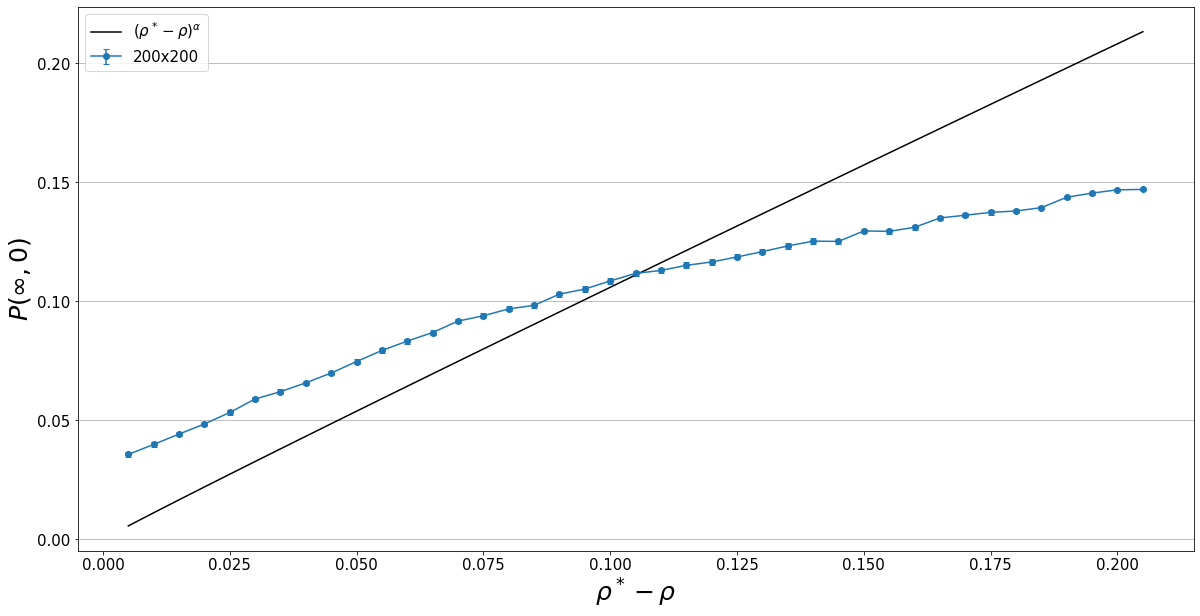

In [13]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.errorbar(pp, aver_pers_close200[::-1][1:], yerr=errs_pers200[1:], fmt='o-', capsize=3, label='200x200')
ax.plot(pp, pp ** alpha200, label='$%s$'%'(\\rho^* - \\rho)^\\alpha', color='black')
ax.set_xlabel('$%s$'%'\\rho^* - \\rho',fontsize=25)
ax.set_ylabel('$%s$'%'P(\\infty,0)',fontsize=25)
ax.legend(prop={'size': 15})
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(b=True,axis='y')

### Второй вариант фитирования

$P(\infty, 0) \propto A + B\ln{(\rho^* - \rho)}$

где $\rho$ - это процент активных узлов, $\rho^*$ - вычисленное значение процента активных узлов, при котором достигается максимальная плотность кооператоров, а, $A$, $B$ - свободные параметры.